In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Downloads/heart_disease_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X=df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [4]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7951219512195122
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [7]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred_nb))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred_nb))
print("Classification Report:",classification_report(y_test,y_pred_nb))

Accuracy: 0.8
Confusion Matrix: [[72 30]
 [11 92]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [8]:
from sklearn.metrics import roc_curve, auc
y_prob_logistic=model.predict_proba(X_test)[:,1]
y_prob_nb=nb_model.predict_proba(X_test)[:,1]

fpr_logistic, tpr_logistic, _=roc_curve(y_test, y_prob_logistic)
fpr_nb,tpr_nb,_=roc_curve(y_test,y_prob_nb)

roc_auc_logistic=auc(fpr_logistic, tpr_logistic)
roc_auc_nb=auc(fpr_nb,tpr_nb)

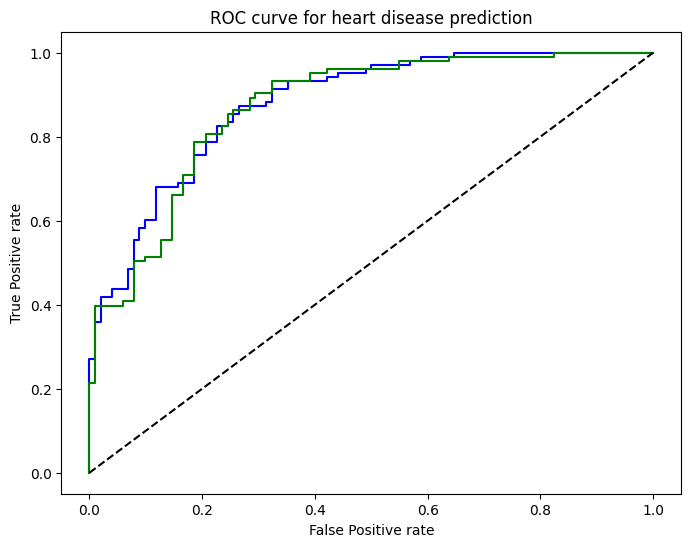

In [10]:
plt.figure(figsize=(8,6))
plt.plot(fpr_logistic, tpr_logistic, color='blue')
plt.plot(fpr_nb, tpr_nb, color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve for heart disease prediction')
plt.show()